# NST Preprocessing Experiment (NPE):
## Top2Vec model from unprocessed dataset

Generating a Topic-to-vector (Top2Vec) model from the unprocessed dataset.

In [1]:
# Imports
import random
import os
import multiprocessing as mp
from top2vec import Top2Vec

from src.utils.file_management import (
    ROOT_PATH,
    load_subtitles,
    write_topics_file)

from src.utils.tables_and_plots import (
    display_n_wordclouds,
    create_wordcloud
)

NST_SAMPLE_SIZE = 1000
EMBEDDING_MODEL = "distiluse"
PIPELINE = "unprocessed"

In [2]:
# Load preprocessed CSV file
folder_path_data = r"nst_preprocessing_experiment/preprocessed_data"
file_name_data = f"npe_{NST_SAMPLE_SIZE}_{PIPELINE}"

subtitled_programs = load_subtitles(folder_path_data, file_name_data)

In [3]:
example_program_id = random.choice(list(subtitled_programs.keys()))
example_program_slice = 5
subtitled_programs[example_program_id][:example_program_slice]

['.', 'Vi', 'er', 'vant', 'til']

In [4]:
# Concatenating tokens to long strings/documents
for (program_id, subtitles) in subtitled_programs.items():
    subtitled_programs[program_id] = " ".join(subtitles)

In [5]:
# Creating/loading model from dataset

folder_path_model = r"nst_preprocessing_experiment/models/top2vec"
file_name_model = f"npe_{NST_SAMPLE_SIZE}_{PIPELINE}_top2vec_{EMBEDDING_MODEL}"
file_path = os.path.join(ROOT_PATH, folder_path_model, PIPELINE, file_name_model)

top2vec = None

if os.path.exists(file_path):
    top2vec = Top2Vec.load(file_path)
else:
    if EMBEDDING_MODEL == "distiluse":
        embedding = "distiluse-base-multilingual-cased"
    top2vec = Top2Vec(documents=list(subtitled_programs.values()), embedding_model=embedding, min_count=5, speed="fast-learn", workers=mp.cpu_count() - 2)
    top2vec.save(file_path)

In [6]:
num_topics = top2vec.get_num_topics()
num_topics

8

In [7]:
topic_sizes, _ = top2vec.get_topic_sizes()
topic_sizes

array([285, 131, 131, 123, 117,  80,  73,  59], dtype=int64)

In [8]:
topic_words, word_scores, topic_nums = top2vec.get_topics(num_topics)

In [9]:
topic_word_scores = [dict(zip(topic_words[i][:20], word_scores[i])) for i in topic_nums]

In [10]:
for i in range(5):
    print("\n", i)
    print(topic_word_scores[i])
    


 0
{'oooooh': 0.17147435, 'pappa': 0.16001102, 'faren': 0.15905134, 'hi': 0.15766273, 'hallo': 0.15629904, 'ooo': 0.15626743, 'fortelle': 0.15474479, 'hei': 0.15396577, 'ooh': 0.15115055, 'fader': 0.1509209, 'aaa': 0.14784536, 'oi': 0.14741857, 'hey': 0.14695475, 'pappaen': 0.14618313, 'fortell': 0.14465046, 'onkel': 0.14456806, 'hua': 0.14360428, 'oh': 0.14340356, 'pr': 0.14338124, 'heie': 0.14289412}

 1
{'fjellveggen': 0.1867663, 'nordsjøen': 0.16589242, 'nordfjord': 0.16468821, 'snøgrense': 0.16430096, 'nordlandsbanen': 0.15981774, 'dovrefjell': 0.15344262, 'fjellreven': 0.15022759, 'sjalottløk': 0.15011393, 'verdenstoppen': 0.14894573, 'fjellene': 0.1444002, 'arktis': 0.14289626, 'fjells': 0.14188407, 'flekkefjord': 0.14182366, 'fjelltur': 0.14179215, 'denne': 0.14118809, 'nordpolen': 0.14105013, 'skattesystemet': 0.14075822, 'nordkapp': 0.13821514, 'dette': 0.13735162, 'no': 0.13656658}

 2
{'politikerne': 0.27045918, 'politikeren': 0.26519218, 'politikere': 0.25887287, 'regjeri

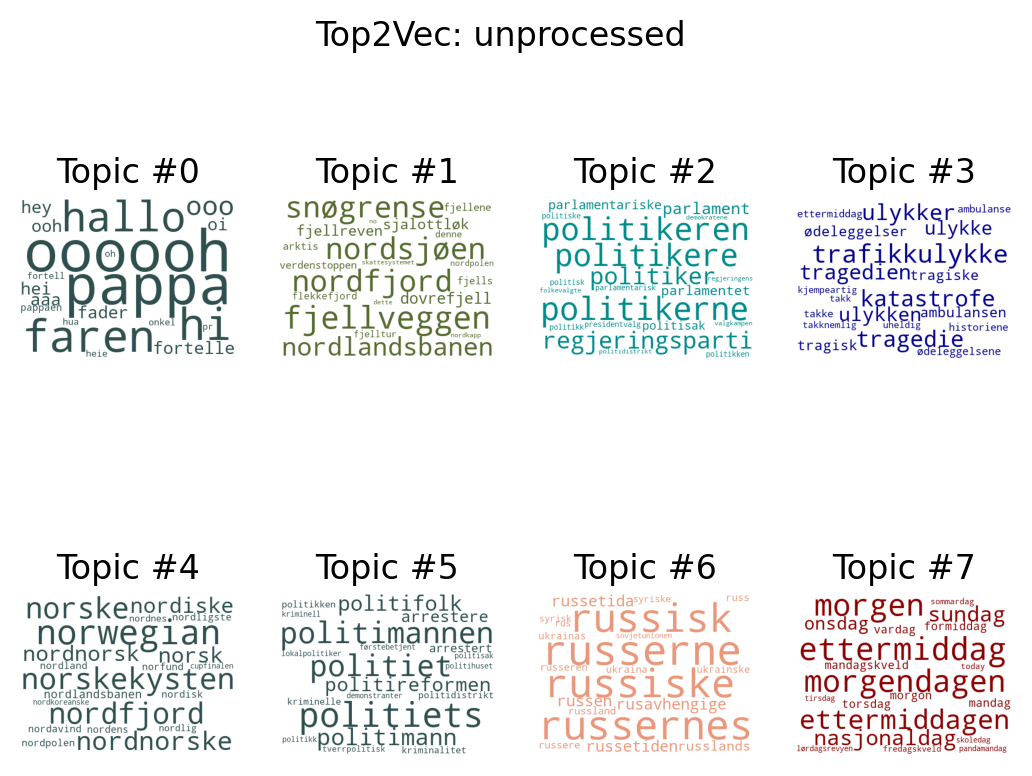

In [40]:
display_n_wordclouds(topic_word_scores, "Top2Vec: " + PIPELINE, num_topics, dpi=200)

In [11]:
folder_path_word_cloud = f"nst_preprocessing_experiment/results/word_clouds/top2vec/{PIPELINE}"

for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i], width=1600, height=1600)
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_v2_{i}.png")))

In [20]:
# Save topic words of model to file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

folder_path_topics = r"nst_preprocessing_experiment/results/topics/"
file_name_topics = file_name_data + "_v2"

write_topics_file(folder_path_topics, file_name_topics, topic_words_numbered, model="top2vec", top2vec_embedding=EMBEDDING_MODEL)